# Property Price Prediction

Property prediction is very popular application of ML. Some use cases of this project-

Appraisal: ML models can assist appraisers in determining the fair market value of properties, providing a more objective and data-driven approach to valuation.

Investment: Real estate investors can leverage ML to identify undervalued properties, optimize their investment strategies, and make informed decisions about property acquisition and disposition.

Risk assessment: ML can be used to assess the risk associated with real estate investments, helping lenders and investors make sound financial decisions.



## Obtaining the data

The data was sourced from www.realtor.com, the largest trade association in the United States, with over 1.5 million members. Given the National Association of Realtors' extensive history and reputation, we can confidently assert that the data provided by realtor is highly accurate and free from vague or misleading information.
Moreover this model can be tweeked a bit to obtain data of some different country.

In [1]:
#importing libraries for Data Scraping
import requests
from bs4 import BeautifulSoup

In [2]:
#test url
url_1= 'https://www.realtor.com/international/in/p1'

The link consists the data for Indian region, at the last of the url we see 'p1' which indicates the page number. We can change the number after p and the webpage will change. Here 'p1' indicates page 1.

In [3]:
r=requests.get(url_1) #this is to check if the data scraping request is approved by the site
r

<Response [200]>

[200] signifies that we are free to proceed for data scraping.

### Web scraping 

In [4]:
#creating multiple empty list to store scraped data.
price_list = []
price_inr=[]
location_list = []
rooms_list = []

# Looping the scraping process for 39 different pages which can provide us useful data.
for i in range(1, 39):
    url = f'https://www.realtor.com/international/in/p{i}'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all the elements with the specified classes
    prices = soup.find_all("div", class_="displayConsumerPrice")
    addresses = soup.find_all("div", class_="address")
    rooms = soup.find_all("div", class_="feature-item")
    inr = soup.find_all("div", class_="displayListingPrice")

    # Extract text from each element and append it to the respective lists
    for price in prices:
        price_list.append(price.text)

    for address in addresses:
        location_list.append(address.text)

    for room in rooms:
        rooms_list.append(room.text)
        
    for i in inr:
        price_inr.append(i.text)


### Inspecting the data
Note- The data generated is dynamic since Realtor is continuously updatingf its database and the conclusions must be continuously revised based on the new data.

In [5]:
len(price_list)

301

In [6]:
len(location_list) #All the locations in this list does not have complete data.


945

In [7]:
len(rooms_list )

903

In [8]:
len(price_inr)

301

In [9]:
rooms_list 

[' 3',
 ' 3',
 '1,870.00 sq ft',
 ' 4',
 ' 4',
 '4,500.00 sq ft',
 ' 4',
 ' 4',
 '4,633.00 sq ft',
 ' 3',
 ' 3',
 '2,812.00 sq ft',
 ' 3',
 ' 3',
 '3,146.00 sq ft',
 ' 2',
 ' 2',
 '824.00 sq ft',
 ' 2',
 ' 2',
 '830.00 sq ft',
 ' 3',
 ' 3',
 '1,058.00 sq ft',
 ' 3',
 ' 3',
 '1,374.00 sq ft',
 ' 4',
 ' 4',
 '1,528.00 sq ft',
 ' 2',
 ' 2',
 '897.00 sq ft',
 ' 3',
 ' 3',
 '1,097.00 sq ft',
 ' 3',
 ' 3',
 '1,272.00 sq ft',
 ' 2',
 ' 2',
 '713.00 sq ft',
 ' 2',
 ' 2',
 '1,083.00 sq ft',
 ' 3',
 ' 3',
 '1,191.00 sq ft',
 ' 2',
 ' 2',
 '934.00 sq ft',
 ' 3',
 ' 3',
 '1,161.00 sq ft',
 ' 3',
 ' 3',
 '1,083.00 sq ft',
 ' 2',
 ' 2',
 '1,045.00 sq ft',
 ' 2',
 ' 2',
 '1,087.00 sq ft',
 ' 2',
 ' 2',
 '1,015.00 sq ft',
 ' 3',
 ' 3',
 '1,250.00 sq ft',
 ' 2',
 ' 2',
 '1,058.00 sq ft',
 ' 3',
 ' 3',
 '1,873.00 sq ft',
 ' 3',
 ' 3',
 '1,086.00 sq ft',
 ' 2',
 ' 2',
 '859.00 sq ft',
 ' 2',
 ' 2',
 '1,066.00 sq ft',
 ' 2',
 ' 2',
 '1,035.00 sq ft',
 ' 2',
 ' 2',
 '887.00 sq ft',
 ' 2',
 ' 2',
 '1,025.00

The rooms_list shows a pattern. The firs and second entries are numbers and the thirs is an alpha numeric entry. The pattern repeats itself throughout. The first entry is number of bedrooms, then number od bathrooms and the third entry is of the total area of the property in square feet.

The data has to be separated.

In [10]:
# Separate data into different lists
bedrooms = []
bathrooms = []
areas = []

# Iterate through the rooms_list and extract data
for i in range(0, len(rooms_list), 3):
    bedrooms.append(rooms_list[i])
    bathrooms.append(rooms_list[i + 1])
    areas.append(rooms_list[i + 2])
    

In [11]:
len(bedrooms)

301

In [12]:
len(bathrooms)

301

In [13]:
len(areas)

301

In [19]:
#We have complete data of 296 properties only. Hence we will remove the excess data.
address=location_list[:301] #creating a new variable to store required data.

In [20]:
len(address)

301

## Creating Dataframe and performing EDA

In [21]:
# creating a dictionary for the scraped data.
data = {
    'Address': address,
    'Bedroom': bedrooms,'Bathroom':bathrooms, 'Area': areas,
    'Price_USD': price_list,
    'Price_INR': price_inr
    
}

In [22]:
import pandas as pd #importing pandas to create dataframe.

In [23]:
df=pd.DataFrame(data)

In [24]:
df #

,Address,Bedroom,Bathroom,Area,Price_USD,Price_INR
0,"Sector 63, Gurgaon, Haryana",3,3,"1,870.00 sq ft","USD $408,929","INR ₹34,080,750"
1,"Sector 63, Gurgaon, Haryana",4,4,"4,500.00 sq ft","USD $984,053","INR ₹82,012,500"
2,"Gota, Ahmedabad, Gujarat",4,4,"4,633.00 sq ft","USD $255,716","INR ₹21,311,800"
3,"Gota, Ahmedabad, Gujarat",3,3,"2,812.00 sq ft","USD $155,207","INR ₹12,935,200"
4,"Gota, Ahmedabad, Gujarat",3,3,"3,146.00 sq ft","USD $173,642","INR ₹14,471,600"
...,...,...,...,...,...,...
296,"Jakkur, Bangalore, Karnataka",2,2,799.00 sq ft,"USD $47,638","INR ₹3,970,231"
297,"Jakkur, Bangalore, Karnataka",2,2,"1,062.00 sq ft","USD $88,817","INR ₹7,402,140"
298,"Gottigere, Bangalore, Karnataka",2,2,"1,052.00 sq ft","USD $116,344","INR ₹9,696,284"
299,"Yeshwantpur, Bangalore, Karnataka",3,4,"2,985.00 sq ft","USD $577,720","INR ₹48,148,050"


In [25]:
df.shape

(301, 6)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Address    301 non-null    object
 1   Bedroom    301 non-null    object
 2   Bathroom   301 non-null    object
 3   Area       301 non-null    object
 4   Price_USD  301 non-null    object
 5   Price_INR  301 non-null    object
dtypes: object(6)
memory usage: 14.2+ KB


In [27]:
#checking null values
df.isna().sum()

Address      0
Bedroom      0
Bathroom     0
Area         0
Price_USD    0
Price_INR    0
dtype: int64

There are no null values

#### Analysing the 'Address' column

In [28]:
df.Address.head()

0    Sector 63, Gurgaon, Haryana
1    Sector 63, Gurgaon, Haryana
2       Gota, Ahmedabad, Gujarat
3       Gota, Ahmedabad, Gujarat
4       Gota, Ahmedabad, Gujarat
Name: Address, dtype: object

The format used while entering the data is : 'City', 'Capital' , 'State'


 #### Creating new columns to seggrigate data

In [29]:
# Creating a column for city
df['City']= df.Address.str.split(',').str[0]

In [30]:
df.City

0        Sector 63
1        Sector 63
2             Gota
3             Gota
4             Gota
          ...     
296         Jakkur
297         Jakkur
298      Gottigere
299    Yeshwantpur
300    Yeshwantpur
Name: City, Length: 301, dtype: object

In [31]:
# Creating a column for Capital
df['Capital'] = df.Address.str.split(',').str[1]

In [32]:
 df.Capital

0         Gurgaon
1         Gurgaon
2       Ahmedabad
3       Ahmedabad
4       Ahmedabad
          ...    
296     Bangalore
297     Bangalore
298     Bangalore
299     Bangalore
300     Bangalore
Name: Capital, Length: 301, dtype: object

In [33]:
#Creating a column for  State 

In [34]:
df['State']= df.Address.str.split(',').str[2]

In [35]:
df.State

0         Haryana
1         Haryana
2         Gujarat
3         Gujarat
4         Gujarat
          ...    
296     Karnataka
297     Karnataka
298     Karnataka
299     Karnataka
300     Karnataka
Name: State, Length: 301, dtype: object

In [36]:
df.head()

,Address,Bedroom,Bathroom,Area,Price_USD,Price_INR,City,Capital,State
0,"Sector 63, Gurgaon, Haryana",3,3,"1,870.00 sq ft","USD $408,929","INR ₹34,080,750",Sector 63,Gurgaon,Haryana
1,"Sector 63, Gurgaon, Haryana",4,4,"4,500.00 sq ft","USD $984,053","INR ₹82,012,500",Sector 63,Gurgaon,Haryana
2,"Gota, Ahmedabad, Gujarat",4,4,"4,633.00 sq ft","USD $255,716","INR ₹21,311,800",Gota,Ahmedabad,Gujarat
3,"Gota, Ahmedabad, Gujarat",3,3,"2,812.00 sq ft","USD $155,207","INR ₹12,935,200",Gota,Ahmedabad,Gujarat
4,"Gota, Ahmedabad, Gujarat",3,3,"3,146.00 sq ft","USD $173,642","INR ₹14,471,600",Gota,Ahmedabad,Gujarat


In [37]:
df.drop(['Address'],axis=1, inplace=True)

In [38]:
df.columns

Index(['Bedroom', 'Bathroom', 'Area', 'Price_USD', 'Price_INR', 'City',
       'Capital', 'State'],
      dtype='object')

In [39]:
#Rearranging the columns
new=['State','Capital','City', 'Bedroom', 'Bathroom', 'Area', 'Price_USD', 'Price_INR' ]
df=df[new]

In [40]:
df.head()

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
0,Haryana,Gurgaon,Sector 63,3,3,"1,870.00 sq ft","USD $408,929","INR ₹34,080,750"
1,Haryana,Gurgaon,Sector 63,4,4,"4,500.00 sq ft","USD $984,053","INR ₹82,012,500"
2,Gujarat,Ahmedabad,Gota,4,4,"4,633.00 sq ft","USD $255,716","INR ₹21,311,800"
3,Gujarat,Ahmedabad,Gota,3,3,"2,812.00 sq ft","USD $155,207","INR ₹12,935,200"
4,Gujarat,Ahmedabad,Gota,3,3,"3,146.00 sq ft","USD $173,642","INR ₹14,471,600"


### Data Cleaning

In [41]:
df.Area=df.Area.str.split().str[0]

In [42]:
df.Area= df.Area.str.replace(',','',regex=True)
df.Area= df.Area.str.replace('.00','',regex=True)

In [43]:
df.Price_USD = df.Price_USD.str.replace('USD','',regex=True)
df.Price_USD = df.Price_USD.str.replace('$','',regex=True)
df.Price_USD = df.Price_USD.str.replace(',','',regex=True)

In [44]:
df.Price_INR = df.Price_USD.str.replace('INR','',regex=True)
df.Price_INR = df.Price_USD.str.replace('₹','',regex=True)
df.Price_INR = df.Price_USD.str.replace(',','',regex=True)

In [45]:
df

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
0,Haryana,Gurgaon,Sector 63,3,3,1870,408929,408929
1,Haryana,Gurgaon,Sector 63,4,4,4,984053,984053
2,Gujarat,Ahmedabad,Gota,4,4,4633,255716,255716
3,Gujarat,Ahmedabad,Gota,3,3,2812,155207,155207
4,Gujarat,Ahmedabad,Gota,3,3,3146,173642,173642
...,...,...,...,...,...,...,...,...
296,Karnataka,Bangalore,Jakkur,2,2,799,47638,47638
297,Karnataka,Bangalore,Jakkur,2,2,1062,88817,88817
298,Karnataka,Bangalore,Gottigere,2,2,1052,116344,116344
299,Karnataka,Bangalore,Yeshwantpur,3,4,2985,577720,577720


### Fixing Datatype 

In [46]:
df.columns

Index(['State', 'Capital', 'City', 'Bedroom', 'Bathroom', 'Area', 'Price_USD',
       'Price_INR'],
      dtype='object')

In [47]:
dt=['Bedroom','Bathroom', 'Price_USD','Price_INR']

In [48]:
df[dt]=df[dt].astype(int)

In [49]:
df.Area=df.Area.str.replace("''",'0',regex=True)

In [50]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [51]:
df.dtypes

State         object
Capital       object
City          object
Bedroom        int32
Bathroom       int32
Area         float64
Price_USD      int32
Price_INR      int32
dtype: object

## EDA


In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df.head()

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
0,Haryana,Gurgaon,Sector 63,3,3,1870.0,408929,408929
1,Haryana,Gurgaon,Sector 63,4,4,4.0,984053,984053
2,Gujarat,Ahmedabad,Gota,4,4,4633.0,255716,255716
3,Gujarat,Ahmedabad,Gota,3,3,2812.0,155207,155207
4,Gujarat,Ahmedabad,Gota,3,3,3146.0,173642,173642


In [54]:
df.isna().sum()

State        0
Capital      0
City         0
Bedroom      0
Bathroom     0
Area         1
Price_USD    0
Price_INR    0
dtype: int64

In [55]:
df.dropna(inplace=True)


In [56]:
df.isna().sum()

State        0
Capital      0
City         0
Bedroom      0
Bathroom     0
Area         0
Price_USD    0
Price_INR    0
dtype: int64

C:\Users\prati\AppData\Local\Temp\ipykernel_22060\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

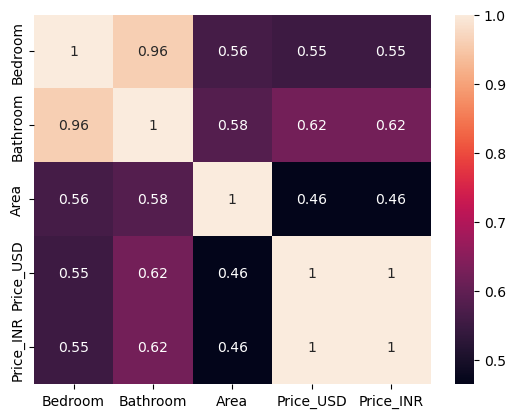

In [57]:
sns.heatmap(df.corr(), annot=True)

With the corelation graph we conclude that-
1. The number of bedroom and bathrooms are corelated.
2. The number of bathrooms affect the price of the property slightly more than the number of bedrooms.

In [58]:
df.columns

Index(['State', 'Capital', 'City', 'Bedroom', 'Bathroom', 'Area', 'Price_USD',
       'Price_INR'],
      dtype='object')

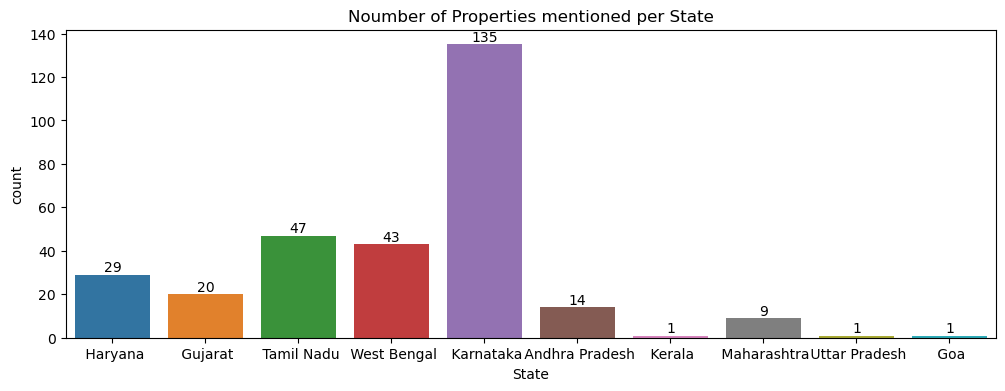

In [59]:
plt.figure(figsize=(12,4))
plt.title('Noumber of Properties mentioned per State')
ax=sns.countplot(x=df['State'])

for bars in ax.containers:
    ax.bar_label(bars)

Since Kerela, Uttar Pradesh and Goa have only one property mentioned we can neglect those entries if average is considered for better analysis.
The data for Karnataka is larger considered to other states.

In [60]:
df.State.unique()

array([' Haryana', ' Gujarat', ' Tamil Nadu', ' West Bengal',
       ' Karnataka', ' Andhra Pradesh', ' Kerala', ' Maharashtra',
       ' Uttar Pradesh', ' Goa'], dtype=object)

In [61]:
#Checking the specifications of propertis in Uttar Pradesh
entries=df[df['State']== ' Uttar Pradesh']
entries

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
248,Uttar Pradesh,Noida,Sector 43,4,5,3395.0,815919,815919


The Property Mentioned for Uttar Pradesh is quiet large. We can compare it with properties of similar parameters for Bedroom and Bathroom.

In [62]:
entries=df[(df['Bedroom']== 4) ]
len(entries)

37

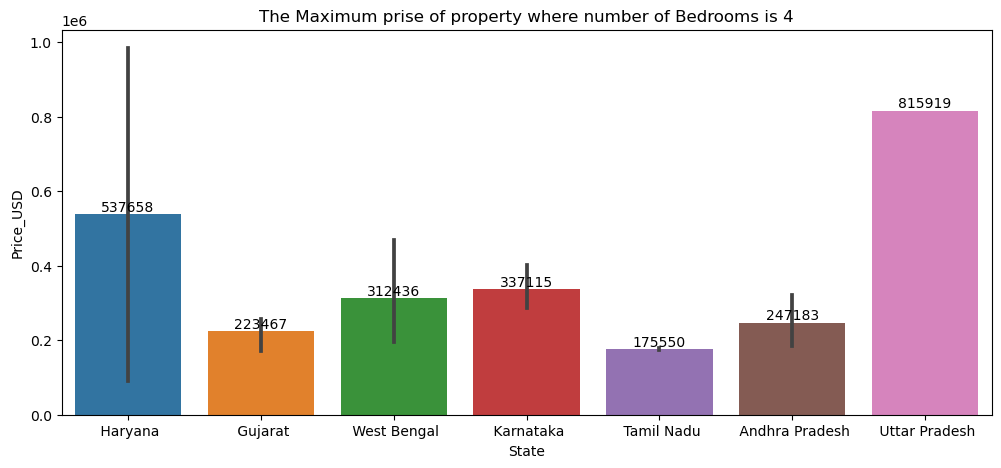

In [63]:
plt.figure(figsize=(12,5))
plt.title('The Maximum prise of property where number of Bedrooms is 4')
ax=df.groupby(['State'], as_index=False)['Price_USD'].max()
bx=sns.barplot(x='State', y='Price_USD', data=entries)

for bar in bx.containers:
    bx.bar_label(bar)

Comparing the maximum cost of a 4 bedroom property in given states we can conclude that the Property rates in Uttar Pradesh is significantly high.

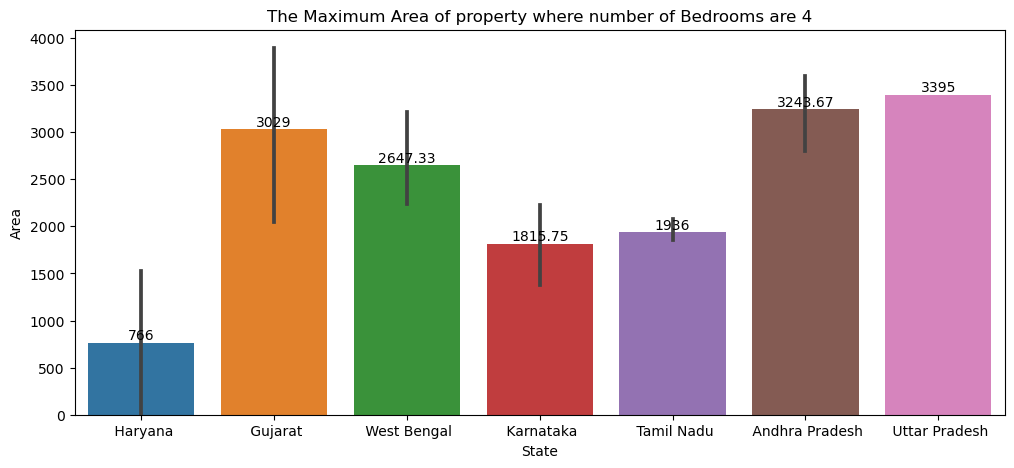

In [64]:
plt.figure(figsize=(12,5))
plt.title('The Maximum Area of property where number of Bedrooms are 4')
ax=df.groupby(['State'], as_index=False)['Area'].max()
bx=sns.barplot(x='State', y='Area', data=entries)

for bar in bx.containers:
    bx.bar_label(bar)

In [65]:
#Checking the specifications of propertis in Kerela
entries=df[df['State']== ' Kerala']
entries

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
157,Kerala,Kappil,Kappil,3,3,770.0,61403,61403


In [66]:
entries=df[(df['Bedroom']== 3) & (df['Bathroom']==3) ]
len(entries)

129

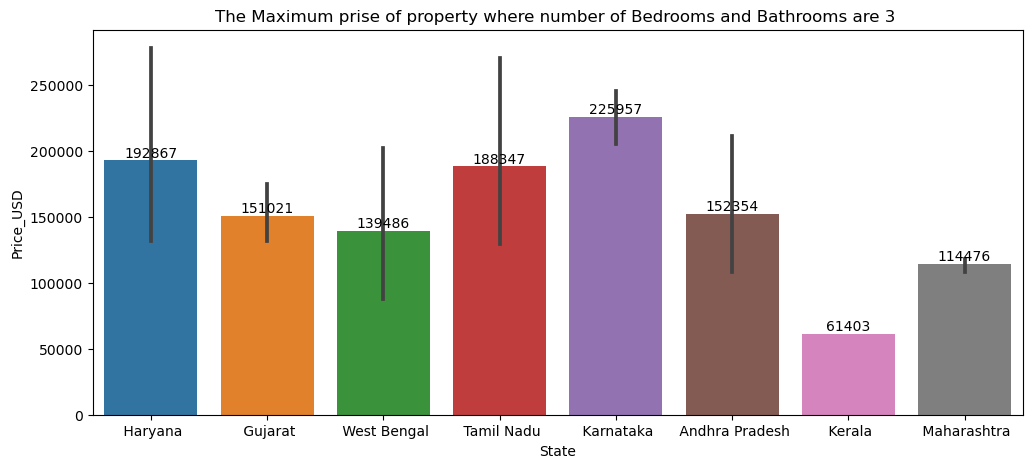

In [67]:
plt.figure(figsize=(12,5))
plt.title('The Maximum prise of property where number of Bedrooms and Bathrooms are 3 ')
ax=df.groupby(['State'], as_index=False)['Price_USD'].max()
bx=sns.barplot(x='State', y='Price_USD', data=entries)

for bar in bx.containers:
    bx.bar_label(bar)

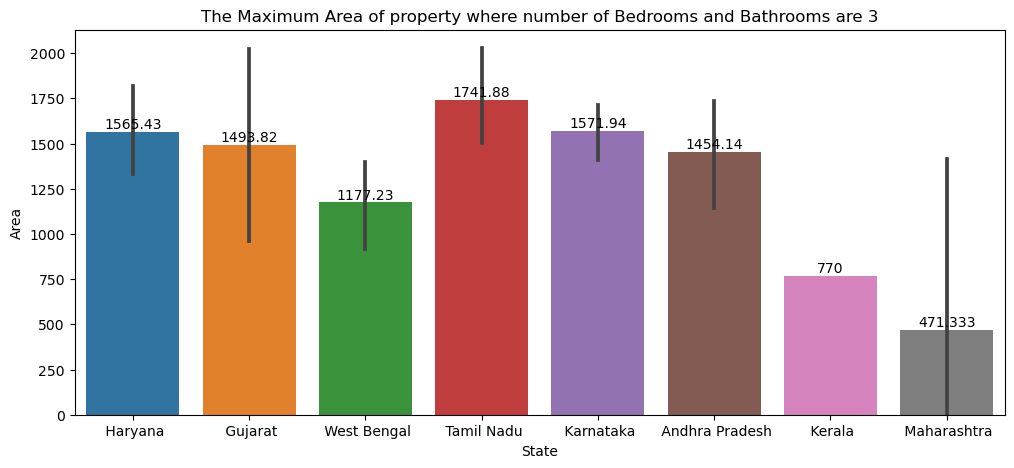

In [68]:
plt.figure(figsize=(12,5))
plt.title('The Maximum Area of property where number of Bedrooms and Bathrooms are 3')
ax=df.groupby(['State'], as_index=False)['Area'].max()
bx=sns.barplot(x='State', y='Area', data=entries)

for bar in bx.containers:
    bx.bar_label(bar)

In [69]:
#Checking the specifications of propertis in Goa
entries=df[df['State']== ' Goa']
entries

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
287,Goa,Arpora,Arpora,1,1,721.0,79738,79738


In [70]:
entries=df[(df['Bedroom']== 1) & (df['Bathroom']==1) ]
len(entries)

22

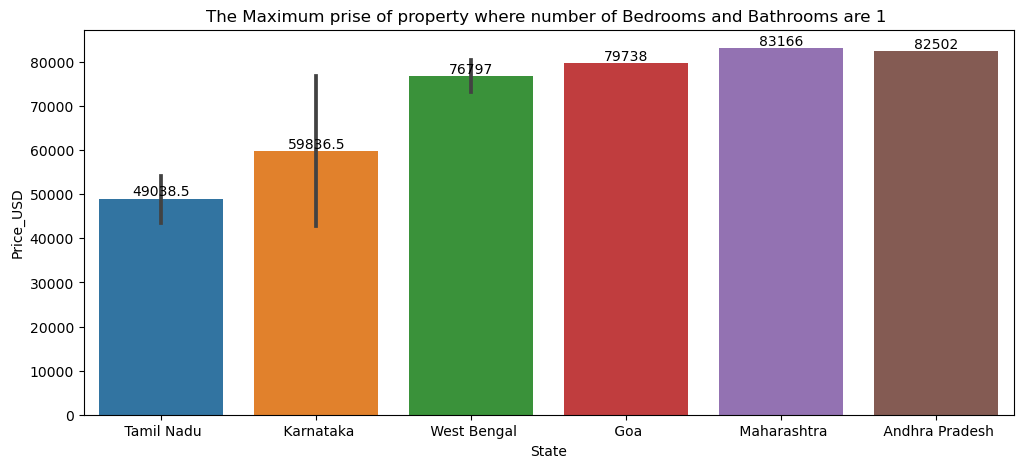

In [71]:
plt.figure(figsize=(12,5))
plt.title('The Maximum prise of property where number of Bedrooms and Bathrooms are 1 ')
ax=df.groupby(['State'], as_index=False)['Price_USD'].max()
bx=sns.barplot(x='State', y='Price_USD', data=entries)

for bar in bx.containers:
    bx.bar_label(bar)

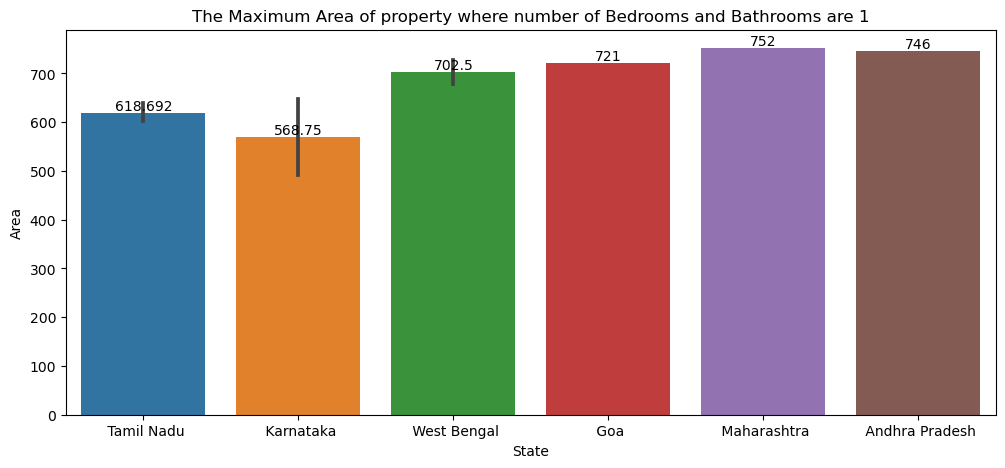

In [72]:
plt.figure(figsize=(12,5))
plt.title('The Maximum Area of property where number of Bedrooms and Bathrooms are 1')
ax=df.groupby(['State'], as_index=False)['Area'].max()
bx=sns.barplot(x='State', y='Area', data=entries)

for bar in bx.containers:
    bx.bar_label(bar)

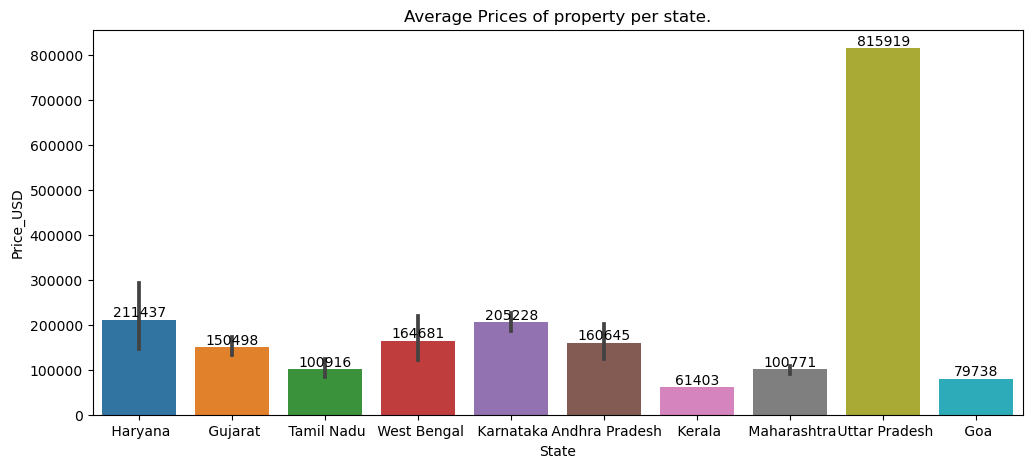

In [73]:
plt.figure(figsize=(12,5))

plt.title('Average Prices of property per state.')

ax=df.groupby(['State'], as_index=False)['Price_USD'].mean()
bx=sns.barplot(x='State', y='Price_USD', data=df)

for bar in bx.containers:
    bx.bar_label(bar)

In [74]:
df.State.value_counts()

 Karnataka         135
 Tamil Nadu         47
 West Bengal        43
 Haryana            29
 Gujarat            20
 Andhra Pradesh     14
 Maharashtra         9
 Kerala              1
 Uttar Pradesh       1
 Goa                 1
Name: State, dtype: int64

# Exploring the Top 3 States

###  1) Exploring Karnataka

In [75]:
df.State.unique()

array([' Haryana', ' Gujarat', ' Tamil Nadu', ' West Bengal',
       ' Karnataka', ' Andhra Pradesh', ' Kerala', ' Maharashtra',
       ' Uttar Pradesh', ' Goa'], dtype=object)

In [76]:
k = df[df['State']==' Karnataka']       

In [77]:
k.head()

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
19,Karnataka,Bangalore,Thanisandra,2,2,1045.0,115570,115570
21,Karnataka,Bangalore,Thanisandra,2,2,1015.0,112252,112252
28,Karnataka,Bangalore,Thanisandra,2,2,1035.0,114464,114464
30,Karnataka,Bangalore,Thanisandra,2,2,1025.0,113358,113358
37,Karnataka,Bangalore,Bagaluru Near Yelahanka,3,3,1068.0,63676,63676


In [78]:
k.City.value_counts()

Whitefield Hope Farm Junction              30
Thanisandra                                27
Chikkanayakanahalli at Off Sarjapur        12
Begur                                       8
Kumbalgodu                                  8
Jalahalli                                   5
Jakkur                                      4
Varthur                                     4
Hebbal                                      2
Narayanapura on Hennur Main Road            2
Hulimavu                                    2
RR Nagar                                    2
Chikkagubbi on Hennur Main Road             2
Yeshwantpur                                 2
Vasanth Nagar                               2
Electronic City Phase 2                     2
Sarjapur Road Wipro To Railway Crossing     1
Gottigere                                   1
Sarjapur                                    1
Padmanabha Nagar                            1
Bettadasanapura                             1
Kanakapura                        

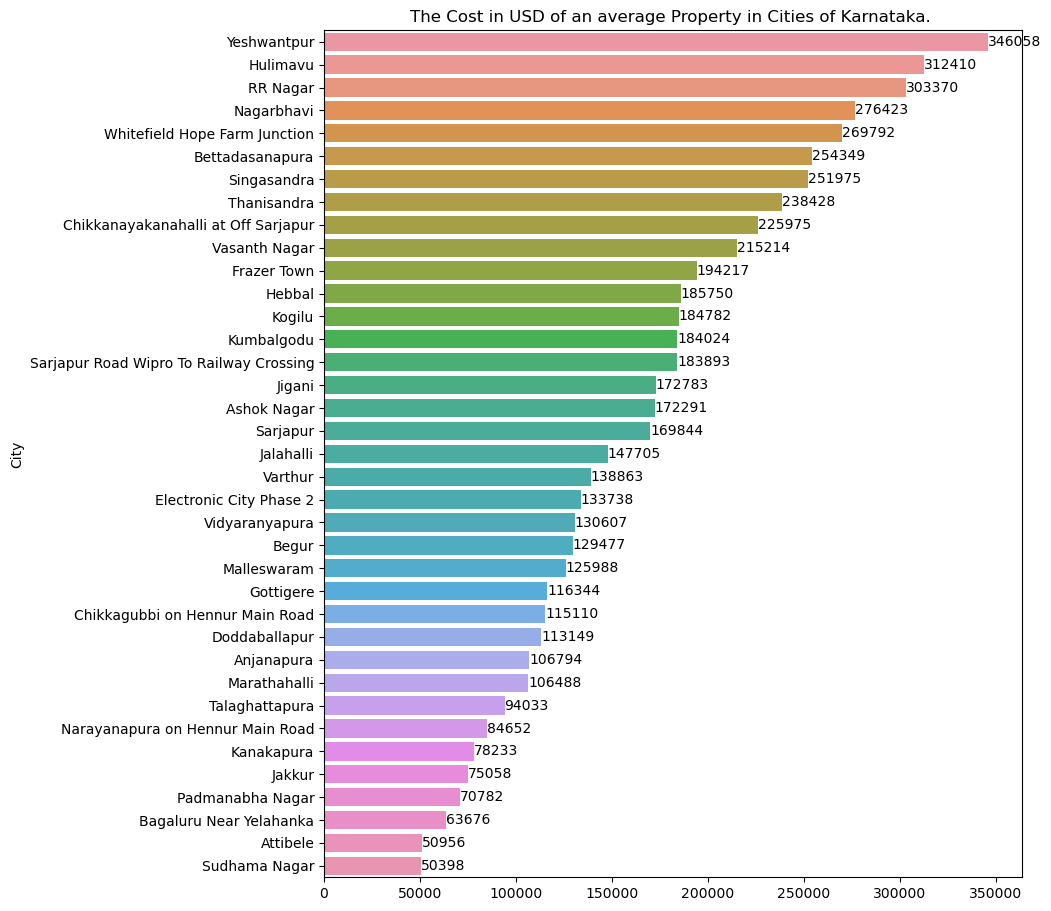

In [79]:
entry= k.groupby(['City'])['Price_USD'].mean().sort_values(ascending=False)


plt.figure(figsize=(9,11))
plt.title('The Cost in USD of an average Property in Cities of Karnataka. ')
ax = sns.barplot(y=entry.index, x=entry.values)

for bars in ax.containers:
    ax.bar_label(bars)

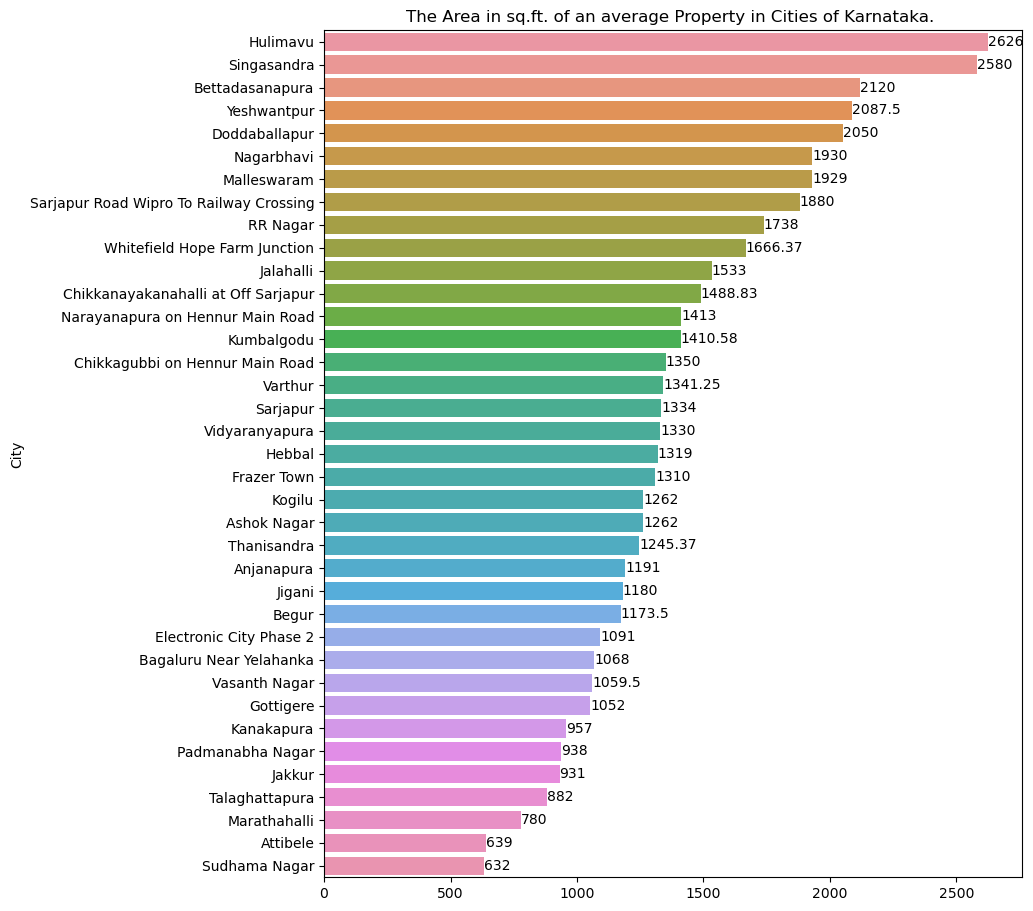

In [80]:
entry= k.groupby(['City'])['Area'].mean().sort_values(ascending=False)


plt.figure(figsize=(9,11))
plt.title('The Area in sq.ft. of an average Property in Cities of Karnataka. ')
ax = sns.barplot(y=entry.index, x=entry.values)

for bars in ax.containers:
    ax.bar_label(bars)

### 2) Exploring Tamil Nadu

In [81]:
 k = df[df['State']==' Tamil Nadu']

In [82]:
k.head()

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
5,Tamil Nadu,Chennai,Perungalathur,2,2,824.0,67360,67360
13,Tamil Nadu,Chennai,Poonamallee,2,2,713.0,59638,59638
24,Tamil Nadu,Chennai,Mogappair,3,3,1873.0,204570,204570
27,Tamil Nadu,Chennai,Mogappair,2,2,1066.0,116394,116394
32,Tamil Nadu,Chennai,Mogappair,3,3,1658.0,181056,181056


In [83]:
k.City.value_counts()

Perungalathur    19
Vanagaram        11
Poonamallee       7
Mogappair         7
Thalambur         1
Medavakkam        1
Padur             1
Name: City, dtype: int64

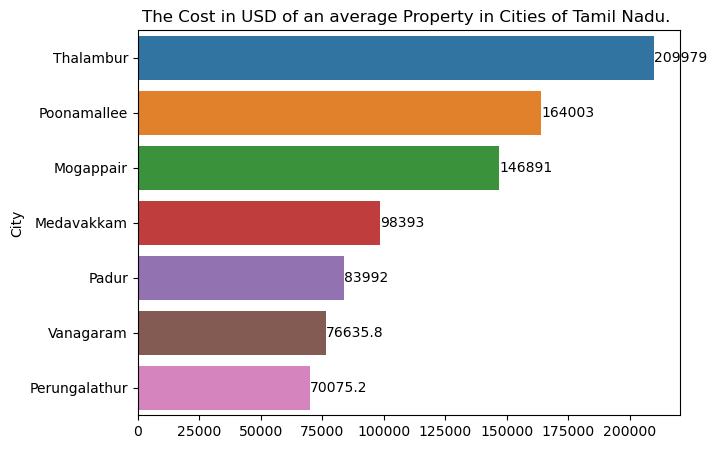

In [84]:
entry= k.groupby(['City'])['Price_USD'].mean().sort_values(ascending=False)


plt.figure(figsize=(7,5))
plt.title('The Cost in USD of an average Property in Cities of Tamil Nadu. ')
ax = sns.barplot(y=entry.index, x=entry.values)

for bars in ax.containers:
    ax.bar_label(bars)

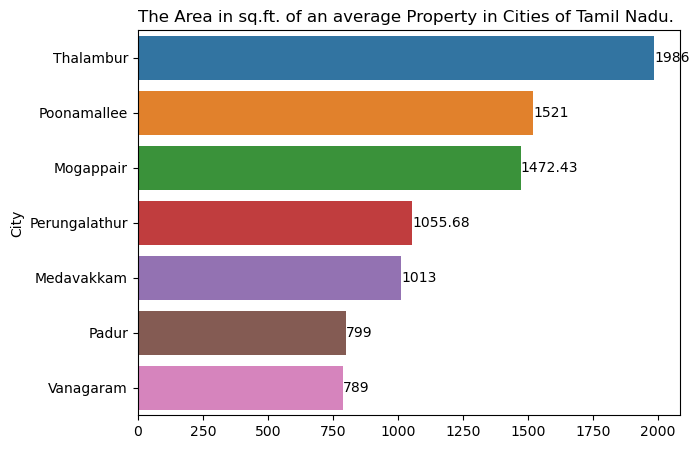

In [85]:
entry= k.groupby(['City'])['Area'].mean().sort_values(ascending=False)


plt.figure(figsize=(7,5))
plt.title('The Area in sq.ft. of an average Property in Cities of Tamil Nadu. ')
ax = sns.barplot(y=entry.index, x=entry.values)

for bars in ax.containers:
    ax.bar_label(bars)

In [86]:
df.State.unique()

array([' Haryana', ' Gujarat', ' Tamil Nadu', ' West Bengal',
       ' Karnataka', ' Andhra Pradesh', ' Kerala', ' Maharashtra',
       ' Uttar Pradesh', ' Goa'], dtype=object)

### 3) Exploring West Bengal

In [87]:
 k = df[df['State']==' West Bengal']
k.head()

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
6,West Bengal,Kolkata,Joka,2,2,830.0,56994,56994
7,West Bengal,Kolkata,Joka,3,3,1058.0,75593,75593
8,West Bengal,Kolkata,Madhyamgram,3,3,1374.0,79612,79612
9,West Bengal,Kolkata,Madhyamgram,4,4,1528.0,82504,82504
10,West Bengal,Kolkata,Madhyamgram,2,2,897.0,53530,53530


In [88]:
k.City.value_counts()


Rajarhat                19
Madhyamgram              7
New Town                 7
Joka                     2
Madurdaha Hussainpur     2
Narendrapur              2
Cossipore                1
Tollygunge               1
Dakshin Gobindopur       1
Chowhati                 1
Name: City, dtype: int64

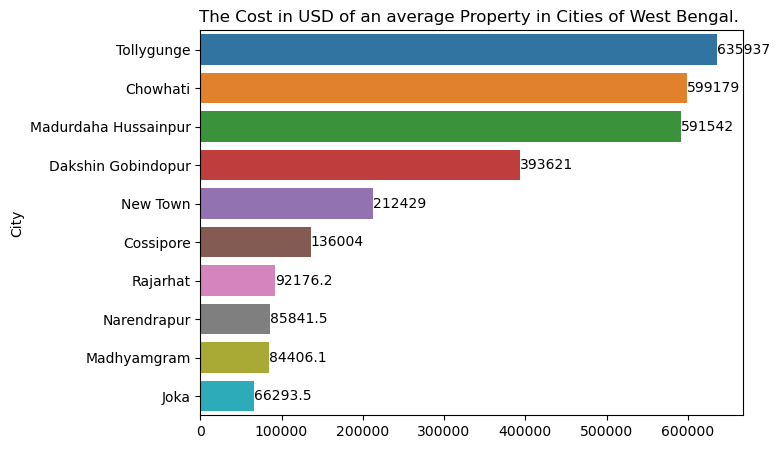

In [89]:
entry= k.groupby(['City'])['Price_USD'].mean().sort_values(ascending=False)


plt.figure(figsize=(7,5))
plt.title('The Cost in USD of an average Property in Cities of West Bengal. ')
ax = sns.barplot(y=entry.index, x=entry.values)

for bars in ax.containers:
    ax.bar_label(bars)

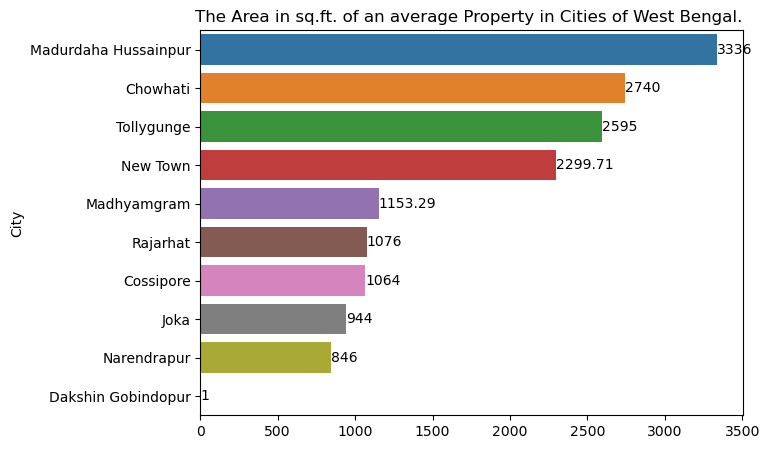

In [90]:
entry= k.groupby(['City'])['Area'].mean().sort_values(ascending=False)


plt.figure(figsize=(7,5))
plt.title('The Area in sq.ft. of an average Property in Cities of West Bengal. ')
ax = sns.barplot(y=entry.index, x=entry.values)

for bars in ax.containers:
    ax.bar_label(bars)

In [91]:
k[k.City=='Dakshin Gobindopur']

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
263,West Bengal,Kolkata,Dakshin Gobindopur,3,3,1.0,393621,393621


On analysing the data of West Bengal we obsere that the area of the property associated with Dakshin Gobindopur is 1 sq.ft. along with 3 bedroom and 3 bathrooms. This signifies that the data is squed and we must remove that data.

In [92]:
len(df)

300

In [93]:
df.drop(df[df['City'] == 'Dakshin Gobindopur'].index, axis=0, inplace=True)


In [94]:
len(df) #The data has been removed

299

# Predictive modelling


In [95]:
df.State.value_counts()

 Karnataka         135
 Tamil Nadu         47
 West Bengal        42
 Haryana            29
 Gujarat            20
 Andhra Pradesh     14
 Maharashtra         9
 Kerala              1
 Uttar Pradesh       1
 Goa                 1
Name: State, dtype: int64

The data for Goa, Uttar Pradesh, Kerela, Maharashtra and Andhra Pradesh are not sufficient so we will not include them in the final dataframe for predictive modelling.

In [96]:
df.State.unique()

array([' Haryana', ' Gujarat', ' Tamil Nadu', ' West Bengal',
       ' Karnataka', ' Andhra Pradesh', ' Kerala', ' Maharashtra',
       ' Uttar Pradesh', ' Goa'], dtype=object)

In [97]:
state= [' Karnataka','Tamil Nadu',' West Bengal',' Haryana',' Gujarat']

In [98]:
final = df[df['State'].isin(state)]

In [99]:
final.State.unique()

array([' Haryana', ' Gujarat', ' West Bengal', ' Karnataka'], dtype=object)

In [100]:
final.head()

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR
0,Haryana,Gurgaon,Sector 63,3,3,1870.0,408929,408929
1,Haryana,Gurgaon,Sector 63,4,4,4.0,984053,984053
2,Gujarat,Ahmedabad,Gota,4,4,4633.0,255716,255716
3,Gujarat,Ahmedabad,Gota,3,3,2812.0,155207,155207
4,Gujarat,Ahmedabad,Gota,3,3,3146.0,173642,173642


### Assigning numeric values to States

In [101]:
final['state_code']=final['State'].map({' Gujarat':1, ' West Bengal':2, ' Karnataka':3, ' Haryana':3})

C:\Users\prati\AppData\Local\Temp\ipykernel_22060\1369197707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['state_code']=final['State'].map({' Gujarat':1, ' West Bengal':2, ' Karnataka':3, ' Haryana':3})


In [102]:
final

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR,state_code
0,Haryana,Gurgaon,Sector 63,3,3,1870.0,408929,408929,3
1,Haryana,Gurgaon,Sector 63,4,4,4.0,984053,984053,3
2,Gujarat,Ahmedabad,Gota,4,4,4633.0,255716,255716,1
3,Gujarat,Ahmedabad,Gota,3,3,2812.0,155207,155207,1
4,Gujarat,Ahmedabad,Gota,3,3,3146.0,173642,173642,1
...,...,...,...,...,...,...,...,...,...
296,Karnataka,Bangalore,Jakkur,2,2,799.0,47638,47638,3
297,Karnataka,Bangalore,Jakkur,2,2,1062.0,88817,88817,3
298,Karnataka,Bangalore,Gottigere,2,2,1052.0,116344,116344,3
299,Karnataka,Bangalore,Yeshwantpur,3,4,2985.0,577720,577720,3


### We will predict the Price in USD

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
final.columns

Index(['State', 'Capital', 'City', 'Bedroom', 'Bathroom', 'Area', 'Price_USD',
       'Price_INR', 'state_code'],
      dtype='object')

In [105]:
x=final[['state_code','Bedroom', 'Bathroom', 'Area']]
y=final[['Price_USD']]

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=50)


In [107]:
print(x_train.shape, y_train.shape)

(158, 4) (158, 1)


In [108]:
print(x_test.shape, y_test.shape)

(68, 4) (68, 1)


In [109]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [110]:
# Regression models
random_forest = RandomForestRegressor()
decision_tree = DecisionTreeRegressor()
xg_boost =  XGBRegressor()
lin_reg  =  LinearRegression()

models=[random_forest, decision_tree, xg_boost, lin_reg]

for model in models:
    model.fit(x_train,y_train)

Dict = {0: 'Random Forest', 1: 'Decision Tree', 2:'XG Boost', 3: 'Linear Regression'}

for i,model in enumerate(models):
    print('{} TestAccuracy:{}'.format
         (Dict[i],model.score(x_test,y_test)))

accuracy=0
classifier=0
models=""


for i, model in enumerate(models):
    if model.score(x_test,y_test)>accuracy:
        accuracy=model.score(x_test,y_test)
        models= model
        classifier=i

print('classifier with best accuracy:{}'.format(Dict[classifier]))

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest TestAccuracy:0.38872950298453024
Decision Tree TestAccuracy:0.32037450244022836
XG Boost TestAccuracy:0.34259706270194834
Linear Regression TestAccuracy:0.23151096600784837
classifier with best accuracy:Random Forest


Since RAndom Forest have he highest accuracy, we will use the randomforst model for prediction.

### Error (Mean Absolute Error)

In [119]:
from sklearn.metrics import mean_absolute_error

In [120]:
forest= random_forest

In [121]:
y_pred = forest.predict(x_test) #prediction
y_pred

array([294977.41      , 316291.27      ,  68662.96      , 251203.2       ,
       295724.54      , 200365.74      , 121897.08      , 299983.41      ,
        99689.19      ,  65932.42      ,  54682.3       , 108849.98      ,
       157209.76      , 344934.535     ,  68571.26      , 129569.99066667,
        96103.168     , 111521.2       ,  98351.09666667, 306243.7       ,
       105714.465     , 333744.18      ,  88914.5       , 223081.1       ,
       185356.44833333, 133400.97      , 118868.04      , 285024.77      ,
       225418.77      ,  99887.58      , 137062.87      , 200134.77      ,
       312436.54      , 114702.22      , 113664.04      , 146593.29      ,
        90315.81      , 119252.78      , 503640.27      , 307582.54      ,
       247264.7       , 248794.36      , 137396.32      , 104404.39      ,
       198402.61      , 171975.62      , 360699.03      , 216453.22      ,
        69764.74      , 235082.46      ,  94803.23      ,  76336.46      ,
       109184.43      , 1

In [122]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
mae

63138.65354901962

In [111]:
final.head()

,State,Capital,City,Bedroom,Bathroom,Area,Price_USD,Price_INR,state_code
0,Haryana,Gurgaon,Sector 63,3,3,1870.0,408929,408929,3
1,Haryana,Gurgaon,Sector 63,4,4,4.0,984053,984053,3
2,Gujarat,Ahmedabad,Gota,4,4,4633.0,255716,255716,1
3,Gujarat,Ahmedabad,Gota,3,3,2812.0,155207,155207,1
4,Gujarat,Ahmedabad,Gota,3,3,3146.0,173642,173642,1


In [129]:
models=[random_forest, decision_tree, xg_boost, lin_reg]

In [130]:
for model in models:
    model.fit(x_train,y_train)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [131]:
Dict = {0: 'Random Forest', 1: 'Decision Tree', 2:'XG Boost', 3: 'Linear Regression'}

In [132]:
for i,model in enumerate(models):
    print('{} TestAccuracy:{}'.format
         (Dict[i],model.score(x_test,y_test)))

Random Forest TestAccuracy:0.4114847371341145
Decision Tree TestAccuracy:0.007392662641796943
XG Boost TestAccuracy:0.2924339441108421
Linear Regression TestAccuracy:0.22725759988400474


In [133]:
accuracy=0
classifier=0
models=""


In [134]:
for i, model in enumerate(models):
    if model.score(x_test,y_test)>accuracy:
        accuracy=model.score(x_test,y_test)
        models= model
        classifier=i

print('classifier with best accuracy:{}'.format(Dict[classifier]))

classifier with best accuracy:Random Forest


###  Prediction using Random Forest Classifier

In [112]:
forest= random_forest


format_= state_code, Bedroom, Bathroom, Area

In [114]:
#Using the first value for prediction
y_pred = forest.predict([[1,4,4,4633.0]])

C:\Users\prati\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [115]:
y_pred


array([367647.16])

### Advantages of this model

1. The nature of the data is dynamic, any update in the property prices or any new entry will be reflected in real time.
2. Little tweeking can be used to analyse data for other country.
3. ML property prediction models offer precise estimates by analyzing various property features and market trends.
4. This ML model can be tailored to specific markets, property types, and preferences, providing a versatile and adaptable solution.
5. Automation streamlines property valuation, saving time and costs compared to traditional manual methods.